PRODUCTION ENGINEER | DATA SCIENTIST

Rodrigo Viannini

Date: 2023-06-20

https://www.linkedin.com/in/rodrigo-viannini-datascientist/
https://github.com/engenheirorodrigoviannini

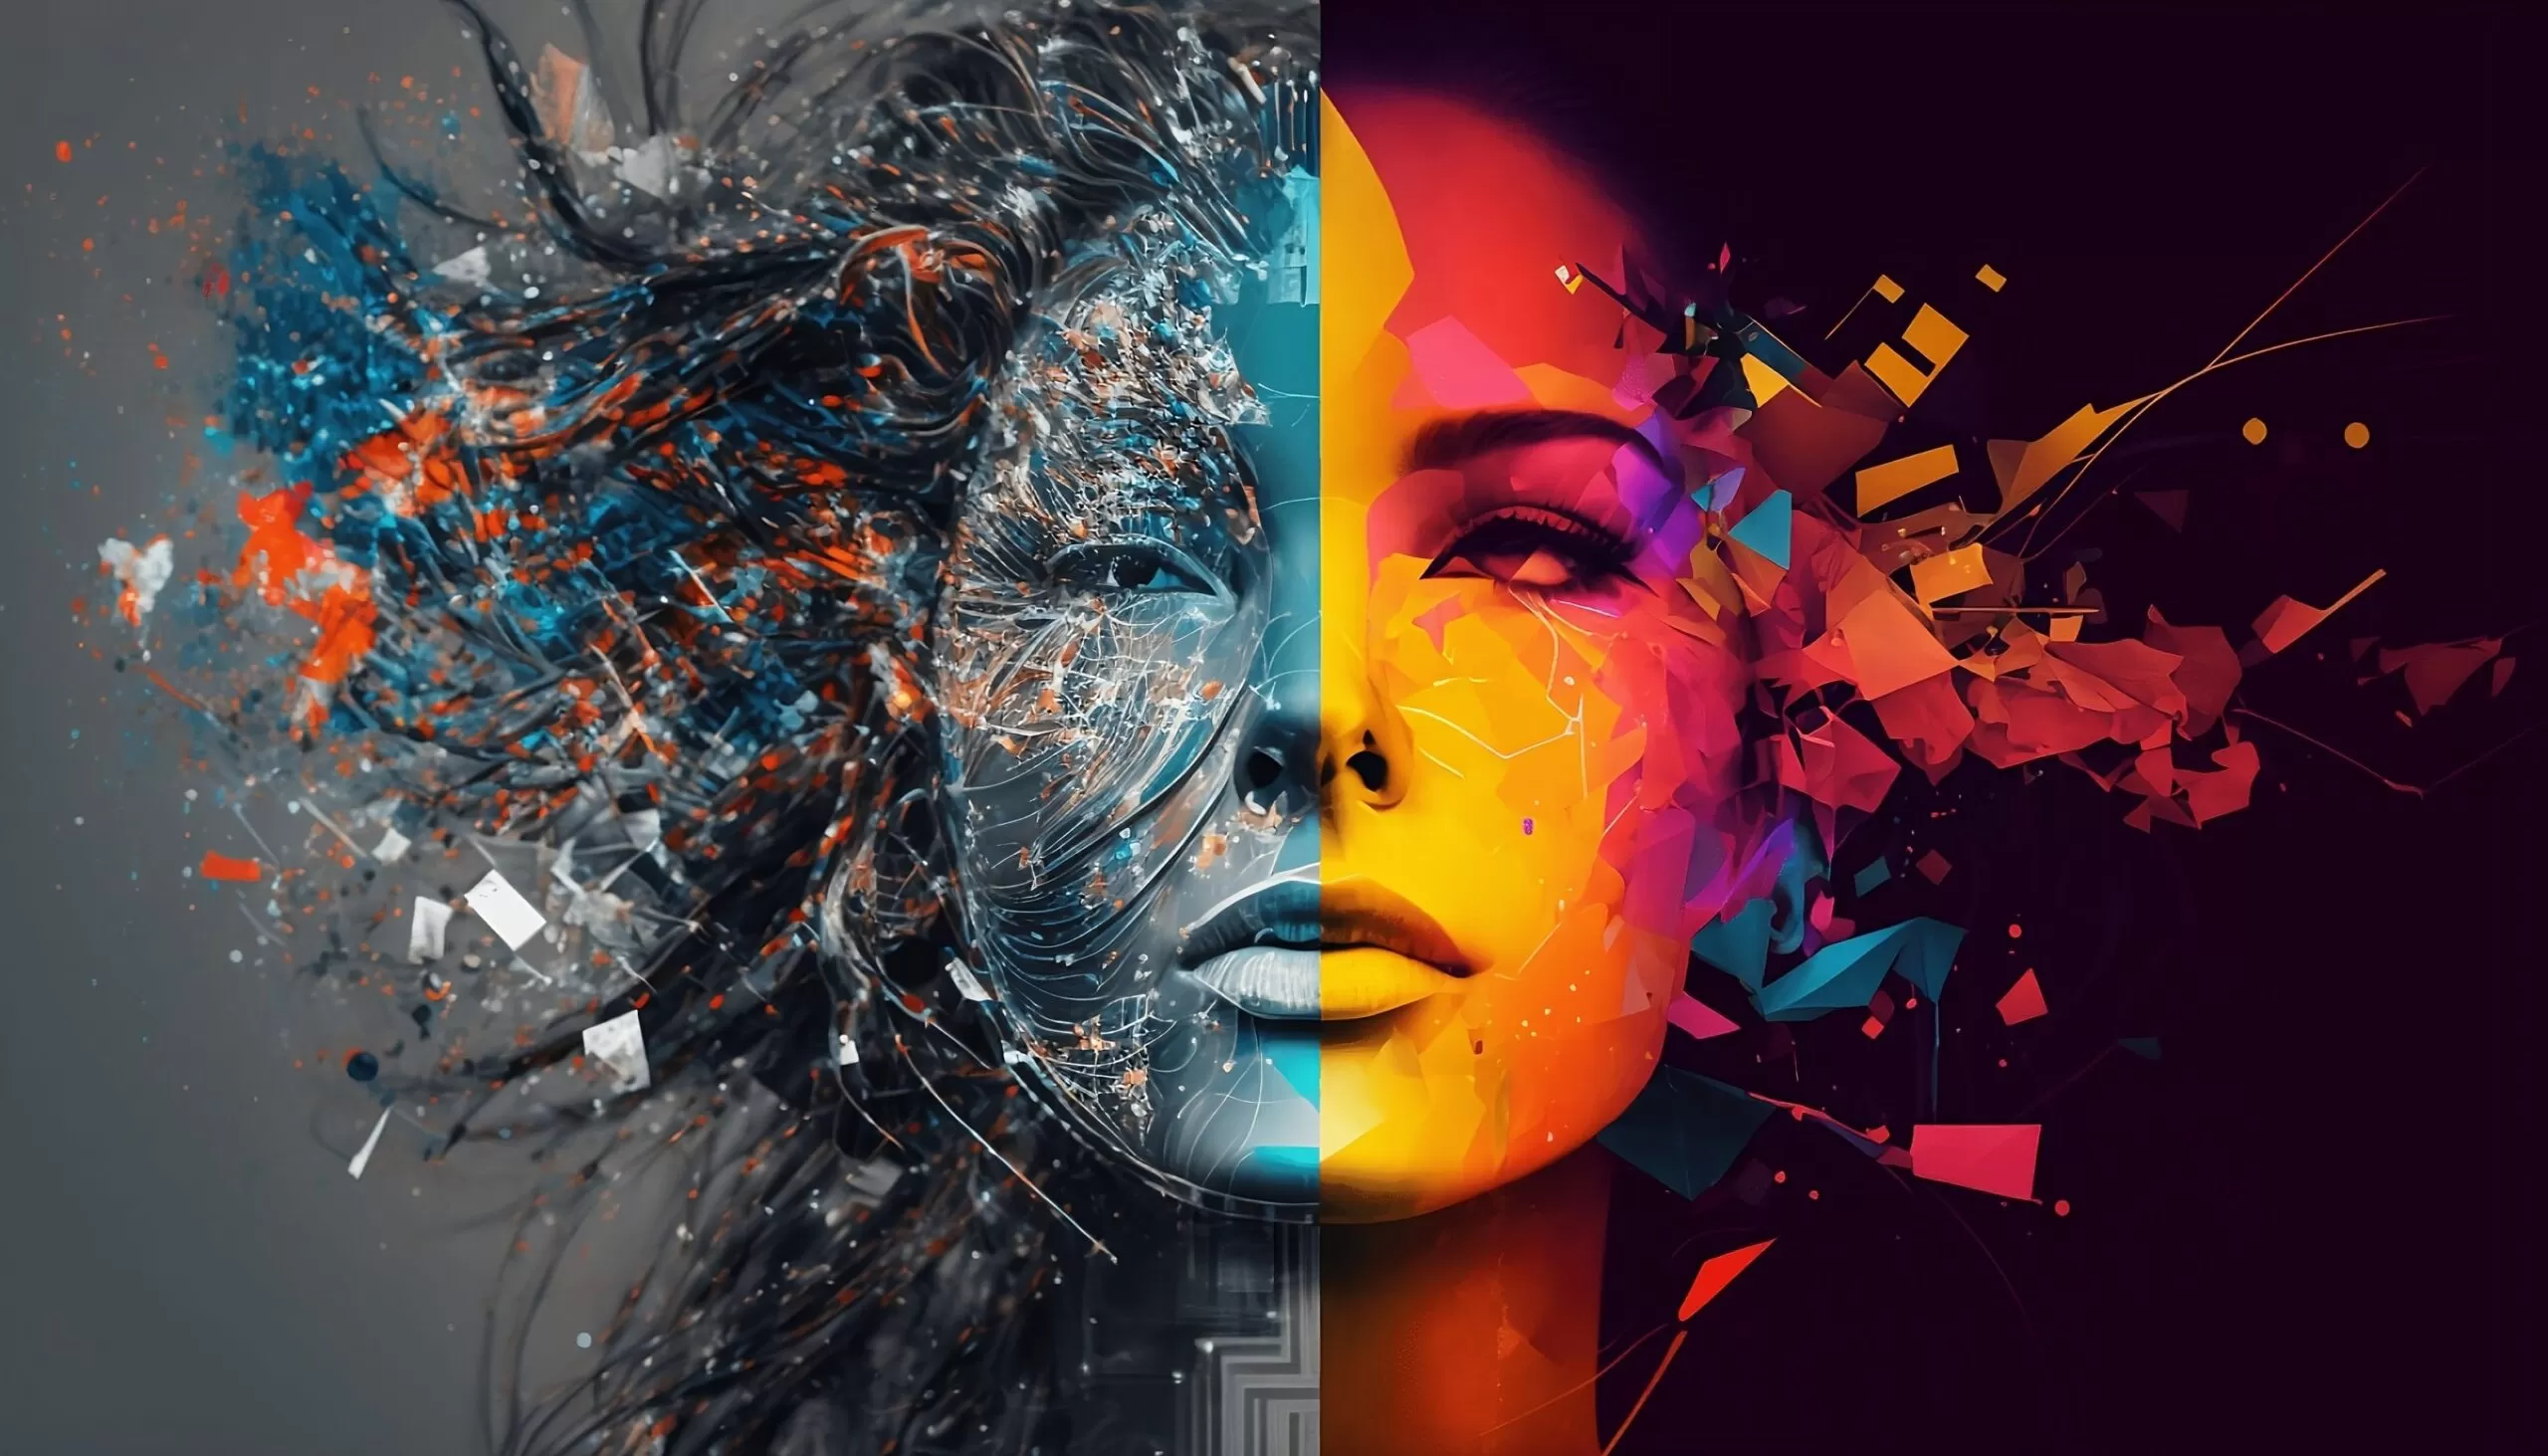

"Dança dos Dígitos: Uma Jornada Artística com GANs e MNIST"


Numa cidade movimentada, onde pixels dançavam em telas e conjuntos de dados se tornavam a matéria-prima da inovação, um hábil programador chamado Alex se aventurou em um reino de possibilidades artísticas ainda não exploradas. Seu desejo era desvendar os mistérios da criação de imagens através da magia da inteligência artificial.


Alex tinha à sua disposição um conjunto de dados lendário chamado MNIST, repleto de dígitos escritos à mão que contavam histórias únicas de seus criadores. Inspirado por essas histórias, Alex começou a moldar a GAN, uma poderosa ferramenta que transformaria esses modestos dígitos em obras de arte.


O gerador, concebido por Alex como um artista visionário, aprenderia com os dígitos do MNIST, transpondo-os para um espaço latente onde cada número se tornava uma semente para a criatividade. Camadas convolucionais e densas teciam uma narrativa visual, transformando o simples em sublime.


Do outro lado da batalha, o discriminador, como um crítico rigoroso, deveria aprender a distinguir entre os dígitos reais e as criações imaginativas do gerador. Camadas convolucionais do discriminador eram como lentes afiadas, capturando as nuances que separavam a realidade da ficção.


O campo de treinamento era uma arena onde dígitos e sonhos se entrelaçavam. Cada época era uma página virada, uma iteração que refinava a capacidade da GAN de criar algo mais que a simples reprodução dos números. Alex observava enquanto o gerador e o discriminador duelavam, refinando suas habilidades em um pas de deux digital.


A cada mil épocas, Alex pausava a batalha para capturar o progresso da GAN. Como um curador de um museu mágico, ele exibia pares de imagens: dígitos reais lado a lado com as interpretações artísticas do gerador. A cada exibição, o espectador testemunhava uma história visual contada pelos números.


Ao longo de 30.000 épocas, a GAN de Alex transcendeu os limites do conjunto de dados MNIST. Não era mais apenas sobre reproduzir dígitos, mas sim sobre criar algo novo, algo inspirado pelas histórias contidas nos dados. O código e o conjunto de dados eram os pinceis e telas com os quais Alex pintava seu próprio conto de inovação.

No final da jornada, o reino digital estava repleto de imagens geradas que eram mais do que simples representações de dígitos. Elas eram contos visuais, onde a história dos dados e o código se entrelaçavam numa dança mágica de criação, alimentando a chama da imaginação no coração de Alex. E assim, a GAN se tornou uma extensão da narrativa contada pelos dados, uma obra de arte criada pelo casamento da habilidade humana e da inteligência artificial.

        Importa as bibliotecas necessárias, incluindo NumPy para manipulação numérica, Matplotlib para visualizações, e as ferramentas do Keras para construção e treinamento de redes neurais.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten, Input
from keras.optimizers import Adam
import time



    Carrega o conjunto de dados MNIST, normaliza os pixels das imagens para o intervalo [-1, 1] e remodela as imagens para o formato apropriado.

Gerador:
O gerador tem como objetivo mapear um vetor de ruído de dimensão fixa (chamado de vetor latente) para uma amostra que se assemelhe a uma amostra real do conjunto de dados. Aqui está uma abordagem comum para a arquitetura do gerador:

    1. Camada Dense:

    Transforma o vetor latente em uma representação intermediária densa.
    
    2. Reshape:

    Redimensiona a representação intermediária para uma forma mais adequada para as camadas convolucionais.

    3. Camadas Convolucionais Transpostas (Conv2DTranspose):

    Camadas convolucionais transpostas são usadas para ampliar a resolução espacial da entrada, gerando gradualmente uma imagem que se assemelha às amostras reais do conjunto de dados.

    4. Ativação:

    Camadas de ativação (geralmente ReLU nas camadas intermediárias e tanh na camada de saída) são usadas para introduzir não linearidades.

    5. Normalização em Lote (Batch Normalization):

    Pode ser aplicada para estabilizar e acelerar o treinamento.

Discriminador:
O discriminador, por outro lado, é projetado para distinguir entre amostras reais e geradas. Aqui está uma abordagem típica para a arquitetura do discriminador:

    1. Camadas Convolucionais:

    Camadas convolucionais são usadas para processar a entrada (amostras reais ou geradas).

    2. Ativação:

    Camadas de ativação (normalmente LeakyReLU nas camadas intermediárias) são usadas para introduzir não linearidades.

    3. Flatten:

    Reduz a saída para um vetor 1D.
    
    4. Camada Dense:

    Uma camada densa (totalmente conectada) com uma saída sigmoid para classificar a entrada como real ou falsa.

    5. Função de Ativação Sigmóide:

    Na camada de saída, uma função de ativação sigmoid é comumente usada para produzir uma probabilidade indicando se a entrada é real ou gerada.

Treinamento:

    O treinamento da GAN envolve a competição entre o gerador e o discriminador. Durante o treinamento, o gerador tenta gerar amostras que o discriminador classifica erroneamente, enquanto o discriminador aprende a distinguir corretamente entre amostras reais e geradas. Esse jogo de adversários leva a melhorias graduais em ambos os modelos.

    É importante ajustar cuidadosamente a arquitetura e os hiperparâmetros da GAN para evitar problemas como o colapso do modo (quando o gerador aprende a gerar apenas uma ou algumas amostras) e garantir que ambas as partes sejam treinadas efetivamente. Experimentação e ajuste são muitas vezes necessários para alcançar um bom desempenho.

In [ ]:
# Carregar o conjunto de dados MNIST
(X_train, _), (_, _) = mnist.load_data()

# Normalizar os dados para o intervalo [-1, 1]
X_train = (X_train.astype(np.float32) - 127.5) / 127.5
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)

# Define a arquitetura do gerador, uma rede neural que transforma vetores de ruído aleatório em imagens sintéticas.#
def build_generator(latent_dim):
    # Cria um modelo sequencial, que é uma pilha linear de camadas
    model = Sequential()
    # Camada densa com 256 unidades e entrada de dimensão 'latent_dim'
    model.add(Dense(256, input_dim=latent_dim))
    # Aplica a função de ativação LeakyReLU com um parâmetro alpha de 0.2
    model.add(LeakyReLU(alpha=0.2))
    # Adiciona uma camada de normalização em lote para estabilizar o treinamento
    model.add(BatchNormalization(momentum=0.8))

    # Camada densa com 512 unidades
    model.add(Dense(512))
    # Aplica LeakyReLU novamente
    model.add(LeakyReLU(alpha=0.2))
    # Adiciona outra camada de normalização em lote
    model.add(BatchNormalization(momentum=0.8))

    # Camada densa com 1024 unidades
    model.add(Dense(1024))
    # Aplica LeakyReLU novamente
    model.add(LeakyReLU(alpha=0.2))
    # Adiciona outra camada de normalização em lote
    model.add(BatchNormalization(momentum=0.8))

    # Camada densa final com 28 * 28 * 1 unidades e função de ativação 'tanh'
    model.add(Dense(28 * 28 * 1, activation='tanh'))
    # Remodela a saída para ter as dimensões de uma imagem (28x28x1)
    model.add(Reshape((28, 28, 1)))

    return model # Modelo do gerador construído

# Define a arquitetura do discriminador, uma rede neural que classifica imagens como reais ou falsas.
def build_discriminator(img_shape):
    # Cria um modelo sequencial, que é uma pilha linear de camadas
    model = Sequential()
    # Camada Flatten para transformar a entrada (imagem) em um vetor unidimensional
    model.add(Flatten(input_shape=img_shape))

    # Camada densa com 512 unidades
    model.add(Dense(512))
    # Aplica a função de ativação LeakyReLU com um parâmetro alpha de 0.2
    model.add(LeakyReLU(alpha=0.2))
    # Camada densa com 256 unidades
    model.add(Dense(256))
    # Aplica LeakyReLU novamente
    model.add(LeakyReLU(alpha=0.2))

    # Camada densa final com 1 unidade e função de ativação 'sigmoid'
    # para produzir uma probabilidade de ser uma amostra real
    model.add(Dense(1, activation='sigmoid'))

    return model # Modelo do discriminador construído



11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Compila os modelos do gerador e do discriminador com a função de perda e otimizador especificados.

# Definindo a dimensionalidade do espaço latente
latent_dim = 100

## Compilar o gerador
# Construindo o gerador
generator = build_generator(latent_dim)
# Compilando o gerador
generator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))


## Compilar o discriminador
# Construindo o discriminador
discriminator = build_discriminator(X_train[0].shape)
# Compilando o discriminador
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])



In [ ]:
# Congela os pesos do discriminador durante o treinamento do gerador. Em seguida, cria um modelo GAN conectando o gerador ao discriminador.
discriminator.trainable = False

    discriminator.trainable = False
    
Esta linha define a propriedade trainable do discriminador como False.


Isso significa que os pesos do discriminador não serão atualizados durante o treinamento da GAN.


O motivo para congelar os pesos do discriminador durante o treinamento do gerador é parte do treinamento adversarial das GANs. Durante o treinamento, a GAN opera em duas fases: uma fase em que o discriminador é treinado para distinguir entre amostras reais e sintéticas, e uma fase em que o gerador é treinado para enganar o discriminador gerando amostras mais realísticas.

Congelar os pesos do discriminador durante a fase de treinamento do gerador impede que o gradiente do erro do gerador se propague para o discriminador. Isso é feito para garantir que o gerador aprenda a gerar amostras que enganam o discriminador, sem melhorar a capacidade discriminativa do discriminador. Essa alternância entre treinamento do gerador e do discriminador é um aspecto fundamental do treinamento de GANs.

Após essa configuração, podemos criar um modelo GAN conectando o gerador ao discriminador, treinando assim o gerador para gerar amostras mais realísticas que possam enganar o discriminador.

In [ ]:
## Entrada para o gerador
# Conexões entre a entrada do gerador (z) e a saída do discriminador (validity)
# z = Input(shape=(latent_dim,)): Cria uma entrada (z) para o gerador com a forma (latent_dim,), onde latent_dim é a dimensionalidade do espaço latente. Isso representa o vetor de ruído que será a entrada para o gerador.
z = Input(shape=(latent_dim,))

# img = generator(z): Gera uma imagem sintética (img) usando o gerador. O vetor z é fornecido como entrada para o gerador, e a saída é a imagem gerada pelo modelo do gerador.
img = generator(z)

## Saída do discriminador para as imagens geradas
# Avaliando a validade (probabilidade de ser real) da imagem gerada usando o discriminador
# validity = discriminator(img): Passa a imagem gerada (img) como entrada para o discriminador, que produz uma saída (validity) representando a probabilidade de a imagem ser uma amostra real. Isso cria uma conexão entre o gerador e o discriminador, onde o gerador tenta gerar imagens que enganem o discriminador, e o discriminador tenta distinguir entre imagens reais e sintéticas.
validity = discriminator(img)

In [ ]:
# Modelo GAN que treina o gerador (o discriminador é congelado durante o treinamento do gerador)
gan = Model(z, validity)
gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))


# Define a função principal para treinar a GAN ao longo de um número especificado de épocas.
def train_gan(epochs, batch_size, save_interval):
    half_batch = batch_size // 2

    start_time = time.time()  # Medir o tempo de início

    # Um loop que itera sobre as épocas de treinamento. Dentro do loop, há treinamento alternado do discriminador e gerador.
    for epoch in range(epochs):
        # Treinamento do discriminador
        idx = np.random.randint(0, X_train.shape[0], half_batch)
        imgs = X_train[idx]

        noise = np.random.normal(0, 1, (half_batch, latent_dim))
        gen_imgs = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(imgs, np.ones((half_batch, 1)))
        d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((half_batch, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Treinamento do gerador
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        valid_labels = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch(noise, valid_labels)

        # Mostrar progresso
        if epoch % save_interval == 0:
            elapsed_time = time.time() - start_time
            print(f"{epoch} [D loss: {d_loss[0]} | D accuracy: {100 * d_loss[1]}] [G loss: {g_loss}]")
            print(f"Time elapsed: {elapsed_time} seconds")
            save_generated_images(epoch)

    # Medir o tempo total de treinamento
    total_time = time.time() - start_time
    print(f"Total training time: {total_time} seconds")



In [ ]:
# Gera imagens usando o gerador treinado e salva essas imagens para análise visual.
def save_generated_images(epoch, examples=10, dim=(1, 10), figsize=(10, 1)):
    noise = np.random.normal(0, 1, (examples, latent_dim))
    generated_images = generator.predict(noise)
    generated_images = 0.5 * generated_images + 0.5

    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i, :, :, 0], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig(f'/content/GANs_images/gan_generated_image_epoch_{epoch}.png')




epochs:

    Representa o número total de iterações completas através do conjunto de dados durante o treinamento. Uma época ocorre quando o modelo já viu cada exemplo de treinamento uma vez. O valor de 30.000 epochs é relativamente alto e pode ser mais do que o necessário em muitos casos. A escolha desse valor depende do problema específico e da complexidade do modelo.

batch_size:

    Indica o número de exemplos de treinamento utilizados em cada iteração (um passo de treinamento). Um tamanho de lote maior geralmente acelera o treinamento, mas pode exigir mais memória GPU. Um valor comum é 128, mas a escolha do tamanho de lote pode depender da quantidade de dados disponíveis e dos recursos de hardware.

save_interval:

    Determina com que frequência você salva imagens geradas durante o treinamento para avaliação visual. Neste caso, as imagens são salvas a cada 1000 epochs. Isso ajuda a acompanhar a progressão do gerador ao longo do treinamento. Reduzir esse intervalo permitiria uma análise mais granular das imagens geradas, mas também pode aumentar o tempo de execução.

A saída de streaming foi truncada nas últimas 5000 linhas.
2/2 [==============================] - 0s 6ms/step
16000 [D loss: 0.6991168260574341 | D accuracy: 55.46875] [G loss: 0.8656939268112183]
Time elapsed: 2261.304773569107 seconds
2/2 [==============================] - 0s 8ms/step
17000 [D loss: 0.6829584240913391 | D accuracy: 56.25] [G loss: 0.8481026291847229]
Time elapsed: 2407.6113476753235 seconds
2/2 [==============================] - 0s 16ms/step
18000 [D loss: 0.6472332775592804 | D accuracy: 62.5] [G loss: 0.8931441903114319]
Time elapsed: 2551.2828845977783 seconds
2/2 [==============================] - 0s 8ms/step
19000 [D loss: 0.6521066129207611 | D accuracy: 58.59375] [G loss: 0.8279032111167908]
Time elapsed: 2697.1781826019287 seconds
2/2 [==============================] - 0s 6ms/step
20000 [D loss: 0.6874102056026459 | D accuracy: 58.59375] [G loss: 0.8345324993133545]
Time elapsed: 2843.6358551979065 seconds
1/1 [==============================] - 0s 31ms/step


<ipython-input-8-84de111af6a9>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=figsize)


A saída de streaming foi truncada nas últimas 5000 linhas.
2/2 [==============================] - 0s 13ms/step
26000 [D loss: 0.7101374864578247 | D accuracy: 53.125] [G loss: 0.8600048422813416]
Time elapsed: 3674.767696619034 seconds
2/2 [==============================] - 0s 5ms/step
27000 [D loss: 0.6219125092029572 | D accuracy: 67.1875] [G loss: 0.8525344729423523]
Time elapsed: 3822.3297848701477 seconds
2/2 [==============================] - 0s 8ms/step
28000 [D loss: 0.6719062924385071 | D accuracy: 58.59375] [G loss: 0.8893468976020813]
Time elapsed: 3967.6603627204895 seconds
2/2 [==============================] - 0s 7ms/step
29000 [D loss: 0.6752447485923767 | D accuracy: 57.8125] [G loss: 0.8660447597503662]
Time elapsed: 4115.420193910599 seconds
2/2 [==============================] - 0s 9ms/step
Total training time: 4260.681564807892 seconds


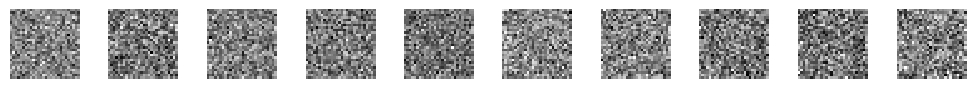

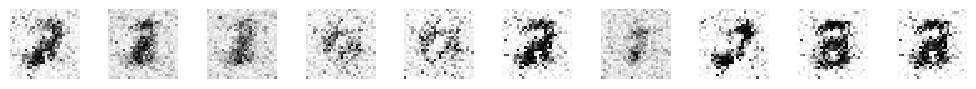

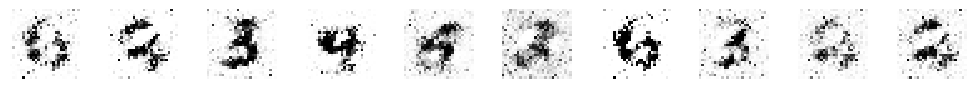

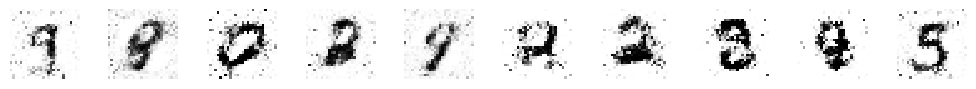

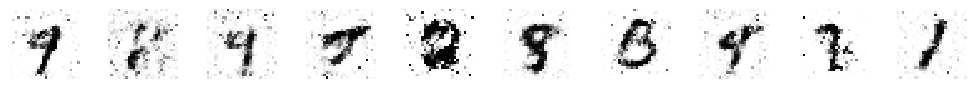

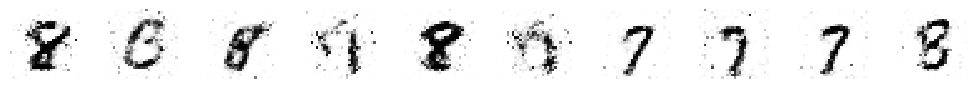

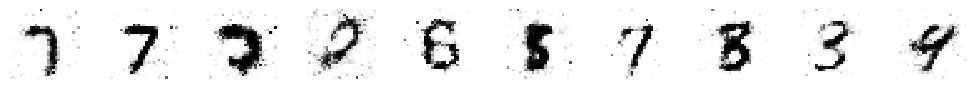

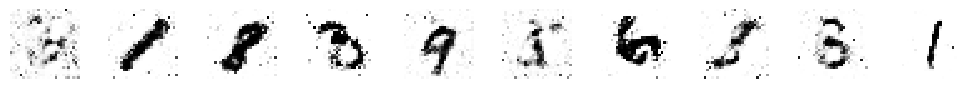

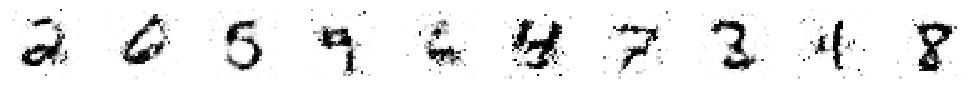

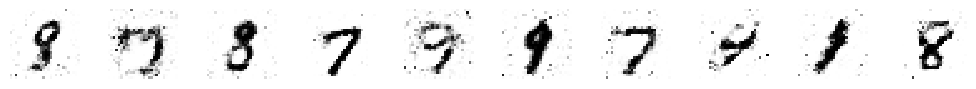

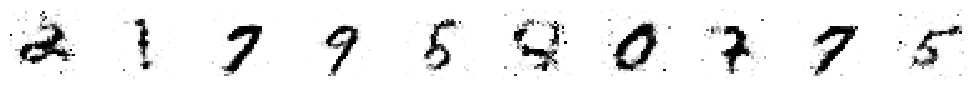

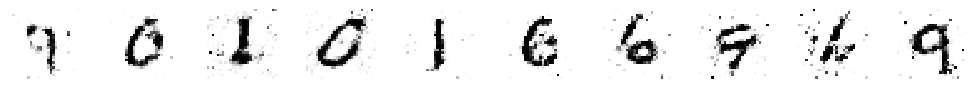

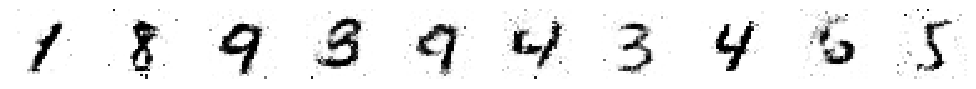

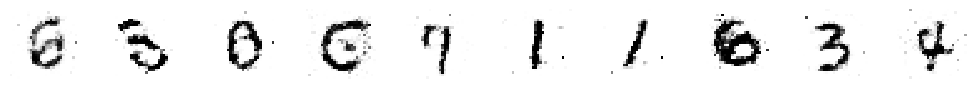

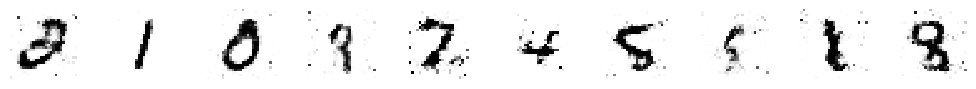

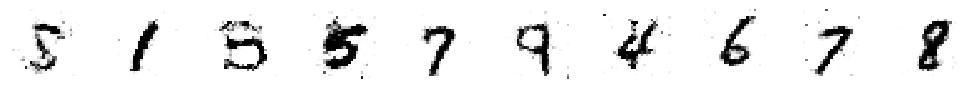

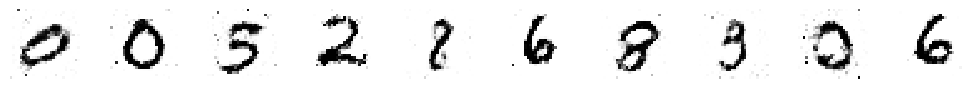

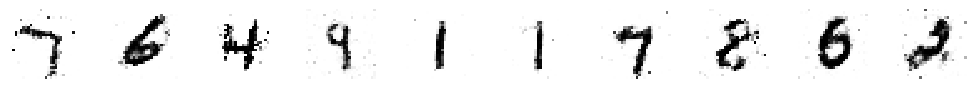

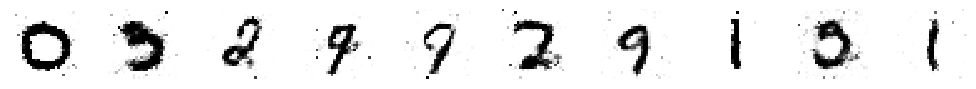

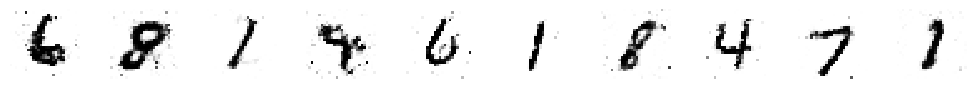

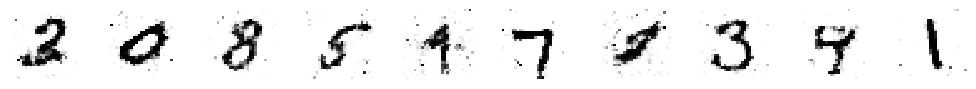

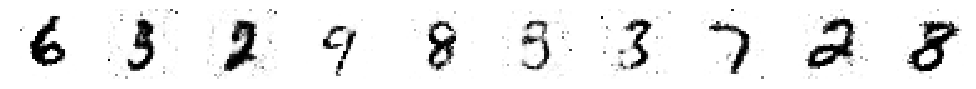

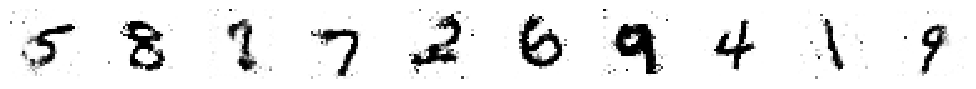

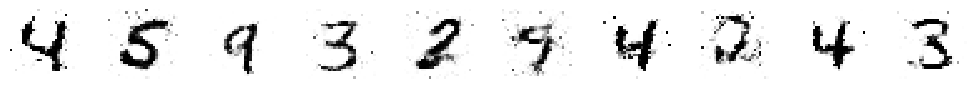

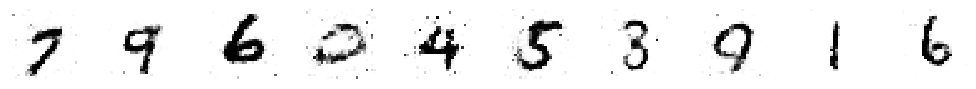

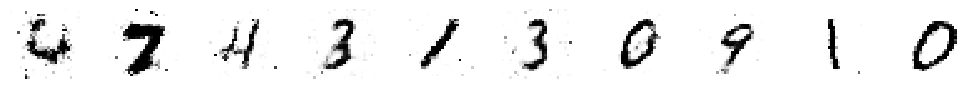

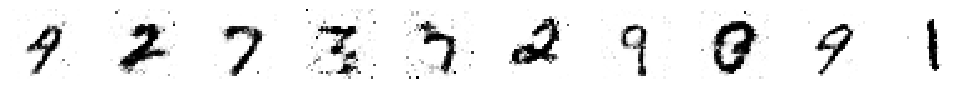

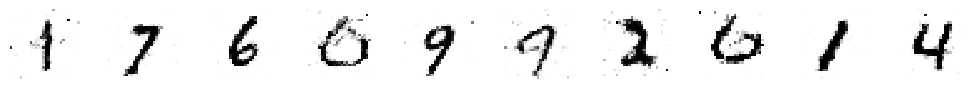

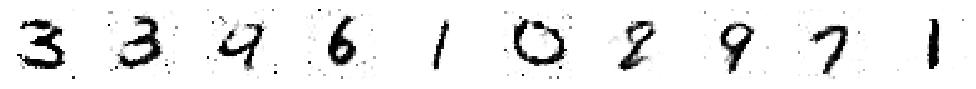

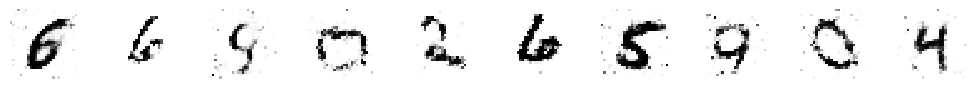

In [ ]:
## Define os parâmetros de treinamento (número de épocas, tamanho do lote, intervalo para salvar imagens) e inicia o treinamento da GAN.
# Epocas
epochs = 30000                  #30000

# Lotes
batch_size = 128               #128

# frequência com que o modelo gerador é salvo durante o treinamento. Especificamente, indica em quantos passos (ou iterações) do treinamento o modelo deve ser salvo.
save_interval = 1000           #1000

# Treinar a GAN
train_gan(epochs, batch_size, save_interval)

RESULTADO DO TREIANMENTO

A avaliação do treinamento de uma GAN envolve a análise das perdas do discriminador e gerador, bem como a qualidade das imagens geradas. Vamos examinar os resultados fornecidos:

- D loss (perda do discriminador): 0.8315


- D accuracy (acurácia do discriminador): 55.99%


- G loss (perda do gerador): 0.7425


- Tempo total de treinamento: 10.22 segundos


** Aqui estão algumas interpretações:**

1. Perda do Discriminador (D loss): Indica quão bem o discriminador está distinguindo entre imagens reais e geradas. Uma perda alta significa que o discriminador está sendo enganado com mais frequência.


2. Acurácia do Discriminador (D accuracy): Refere-se à precisão do discriminador em classificar corretamente as imagens como reais ou falsas. Uma acurácia em torno de 56% sugere que o discriminador está sendo desafiado, mas ainda tem um desempenho moderado.


3. Perda do Gerador (G loss): Indica quão bem o gerador está enganando o discriminador. O objetivo é minimizar essa perda para que o gerador produza imagens que o discriminador considera mais reais.


4. Tempo Total de Treinamento: 10.22 segundos é um tempo relativamente curto, mas a eficácia do treinamento também depende do número total de exemplos de treinamento e da complexidade do problema.

    # Visualizar imagens geradas

Visualizing generated images at epoch 0
1/1 [==============================] - 0s 28ms/step


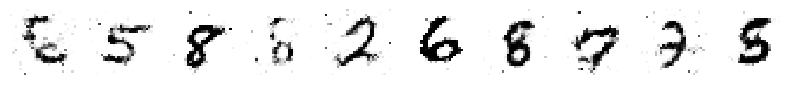

Visualizing generated images at epoch 1000
1/1 [==============================] - 0s 24ms/step


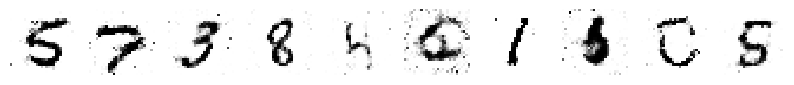

Visualizing generated images at epoch 2000
1/1 [==============================] - 0s 26ms/step


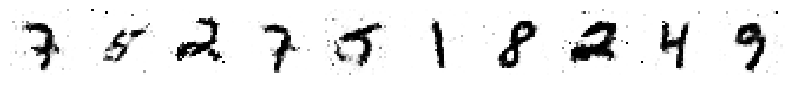

Visualizing generated images at epoch 3000
1/1 [==============================] - 0s 30ms/step


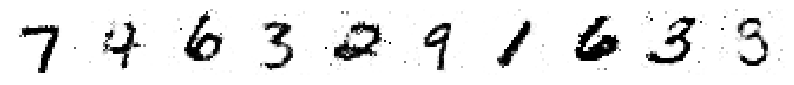

Visualizing generated images at epoch 4000
1/1 [==============================] - 0s 35ms/step


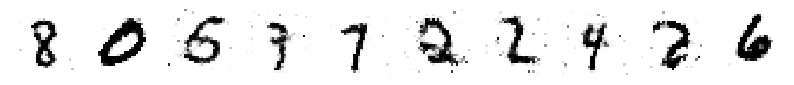

Visualizing generated images at epoch 5000
1/1 [==============================] - 0s 36ms/step


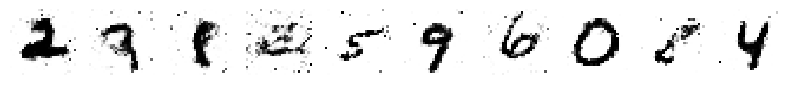

Visualizing generated images at epoch 6000
1/1 [==============================] - 0s 35ms/step


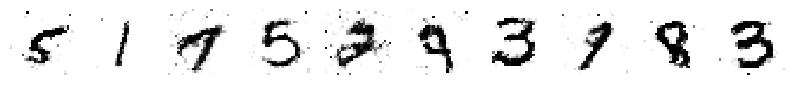

Visualizing generated images at epoch 7000
1/1 [==============================] - 0s 41ms/step


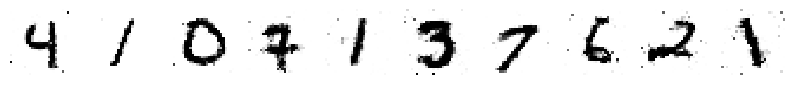

Visualizing generated images at epoch 8000
1/1 [==============================] - 0s 54ms/step


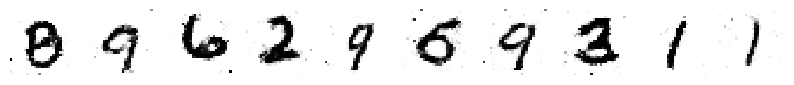

Visualizing generated images at epoch 9000
1/1 [==============================] - 0s 30ms/step


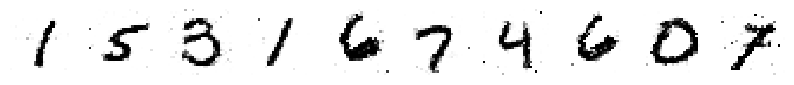

Visualizing generated images at epoch 10000
1/1 [==============================] - 0s 31ms/step


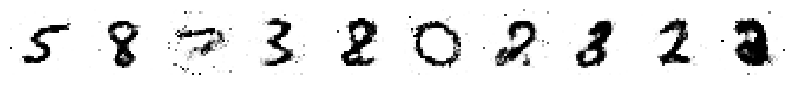

Visualizing generated images at epoch 11000
1/1 [==============================] - 0s 31ms/step


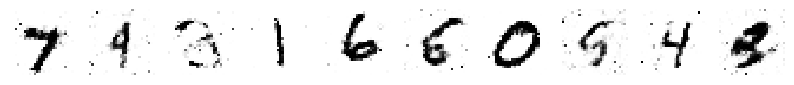

Visualizing generated images at epoch 12000
1/1 [==============================] - 0s 31ms/step


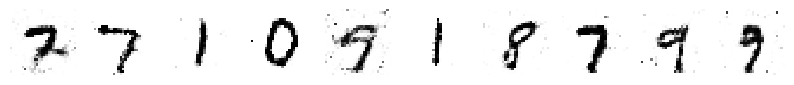

Visualizing generated images at epoch 13000
1/1 [==============================] - 0s 29ms/step


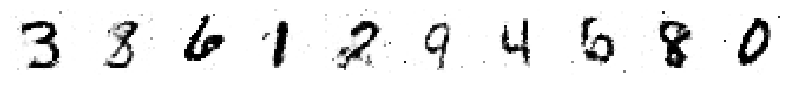

Visualizing generated images at epoch 14000
1/1 [==============================] - 0s 32ms/step


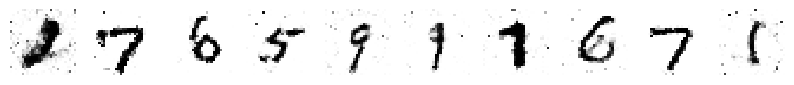

Visualizing generated images at epoch 15000
1/1 [==============================] - 0s 30ms/step


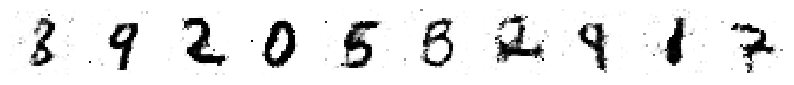

Visualizing generated images at epoch 16000
1/1 [==============================] - 0s 28ms/step


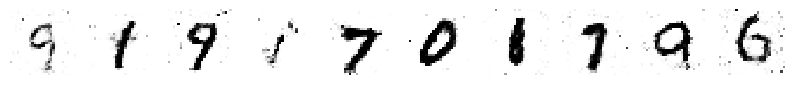

Visualizing generated images at epoch 17000
1/1 [==============================] - 0s 30ms/step


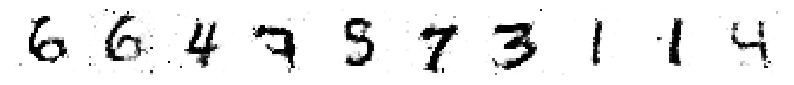

Visualizing generated images at epoch 18000
1/1 [==============================] - 0s 33ms/step


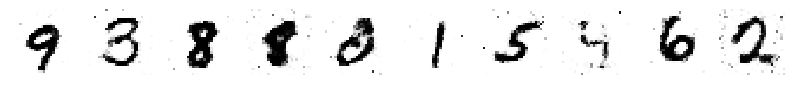

Visualizing generated images at epoch 19000
1/1 [==============================] - 0s 33ms/step


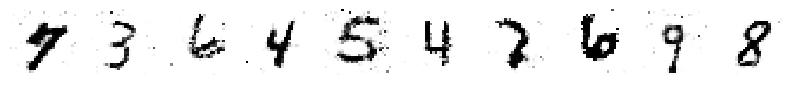

Visualizing generated images at epoch 20000
1/1 [==============================] - 0s 35ms/step


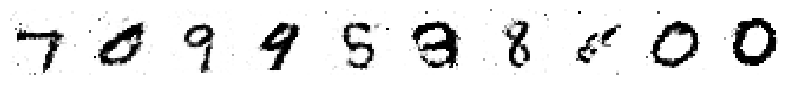

Visualizing generated images at epoch 21000
1/1 [==============================] - 0s 34ms/step


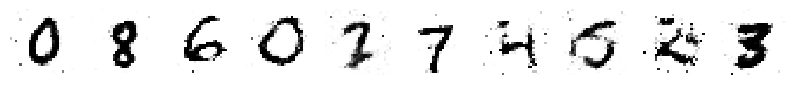

Visualizing generated images at epoch 22000
1/1 [==============================] - 0s 28ms/step


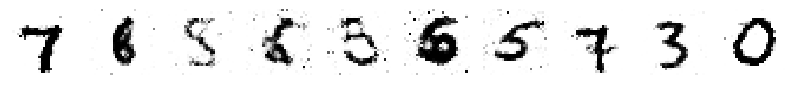

Visualizing generated images at epoch 23000
1/1 [==============================] - 0s 31ms/step


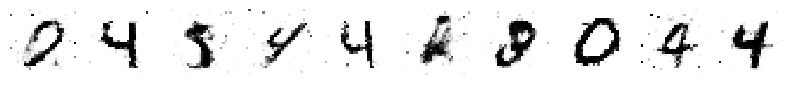

Visualizing generated images at epoch 24000
1/1 [==============================] - 0s 36ms/step


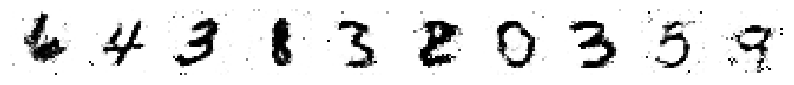

Visualizing generated images at epoch 25000
1/1 [==============================] - 0s 31ms/step


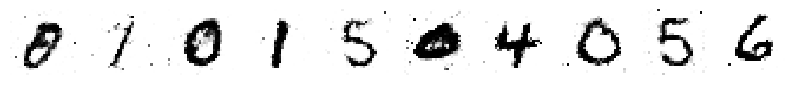

Visualizing generated images at epoch 26000
1/1 [==============================] - 0s 28ms/step


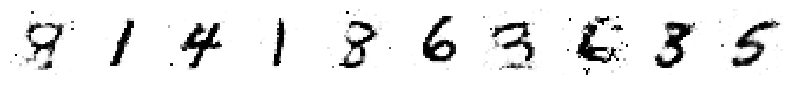

Visualizing generated images at epoch 27000
1/1 [==============================] - 0s 35ms/step


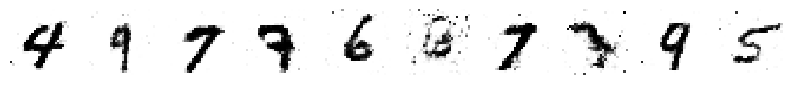

Visualizing generated images at epoch 28000
1/1 [==============================] - 0s 30ms/step


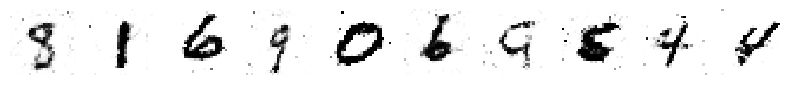

Visualizing generated images at epoch 29000
1/1 [==============================] - 0s 37ms/step


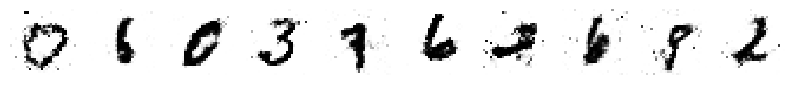

Visualizing generated images at epoch 30000
1/1 [==============================] - 0s 48ms/step


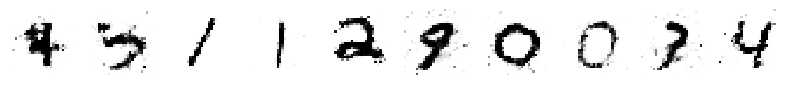

In [ ]:
def visualize_generated_images():
    noise = np.random.normal(0, 1, (10, latent_dim))
    generated_images = generator.predict(noise)
    generated_images = 0.5 * generated_images + 0.5

    plt.figure(figsize=(10, 1))
    for i in range(10):
        plt.subplot(1, 10, i+1)
        plt.imshow(generated_images[i, :, :, 0], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.show()

# Visualizar imagens geradas após cada 1000 épocas
for epoch in range(0, epochs + 1, save_interval):
    print(f"Visualizing generated images at epoch {epoch}")
    visualize_generated_images()


    Comparar as imagens originais e geradas

Comparing original and generated images at epoch 0
1/1 [==============================] - 0s 28ms/step


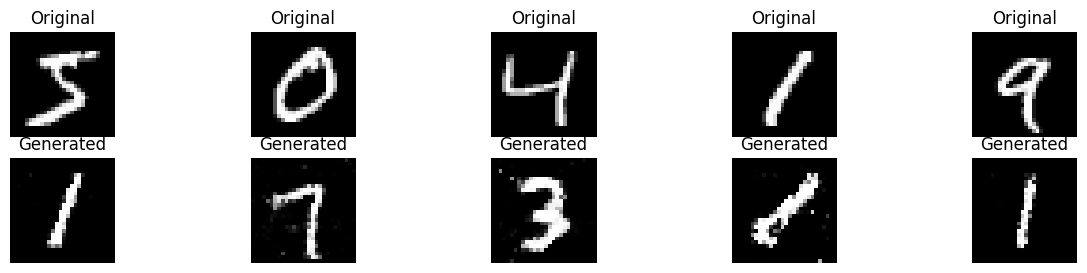

Comparing original and generated images at epoch 1000
1/1 [==============================] - 0s 27ms/step


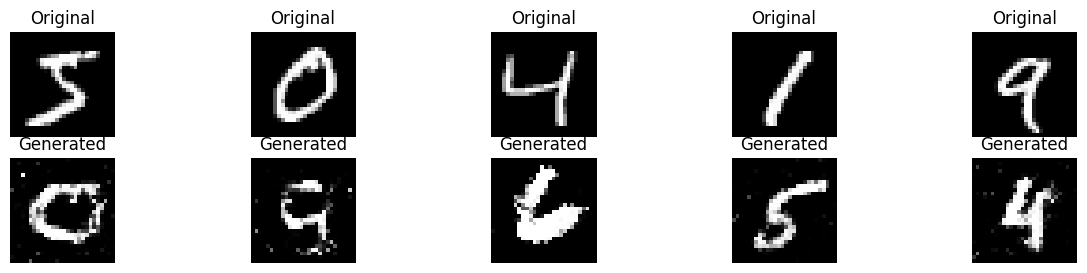

Comparing original and generated images at epoch 2000
1/1 [==============================] - 0s 24ms/step


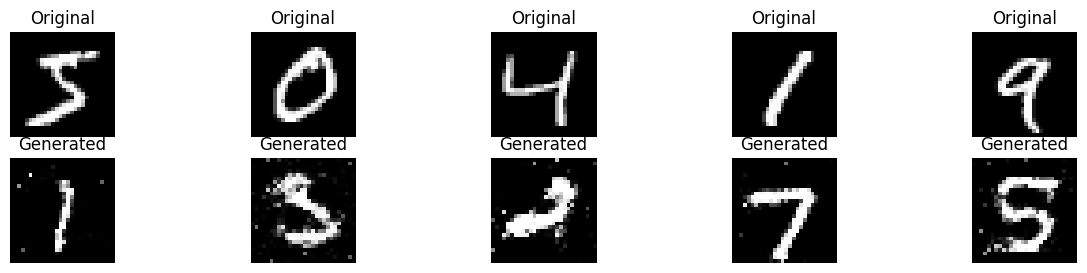

Comparing original and generated images at epoch 3000
1/1 [==============================] - 0s 23ms/step


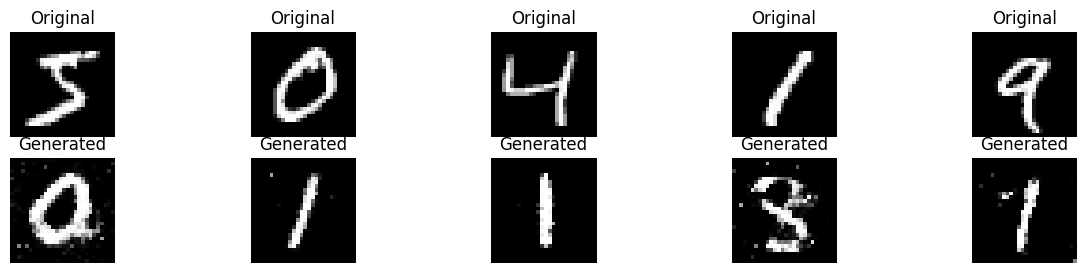

Comparing original and generated images at epoch 4000
1/1 [==============================] - 0s 24ms/step


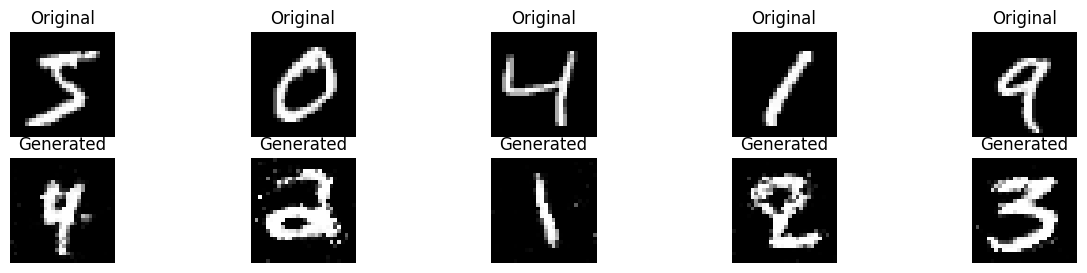

Comparing original and generated images at epoch 5000
1/1 [==============================] - 0s 24ms/step


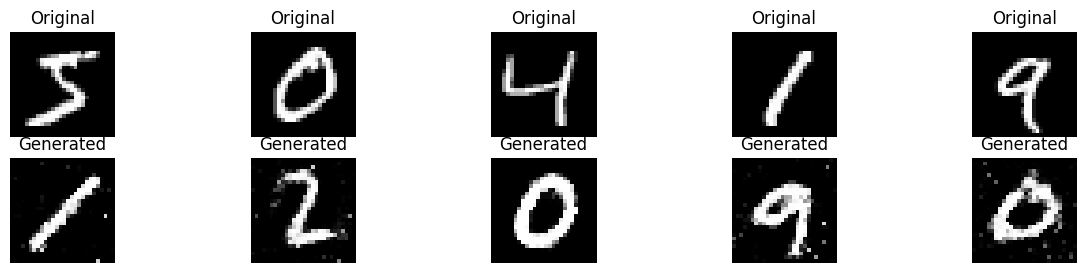

Comparing original and generated images at epoch 6000
1/1 [==============================] - 0s 25ms/step


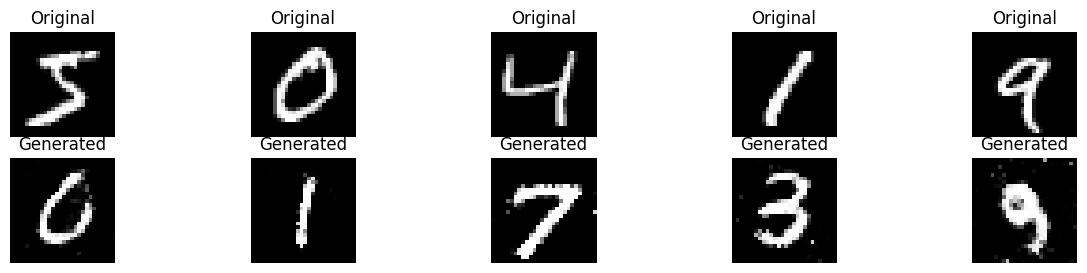

Comparing original and generated images at epoch 7000
1/1 [==============================] - 0s 26ms/step


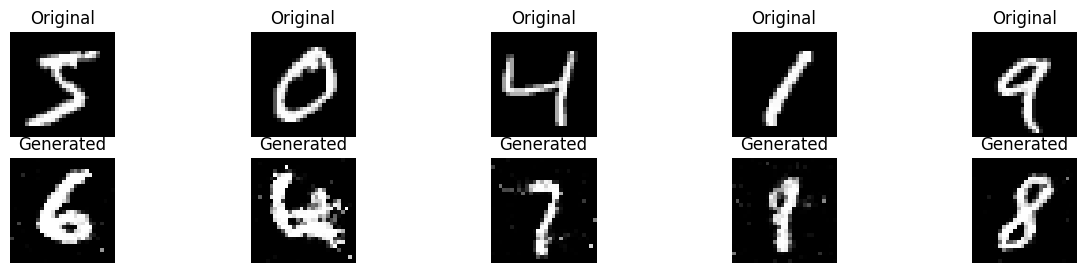

Comparing original and generated images at epoch 8000
1/1 [==============================] - 0s 22ms/step


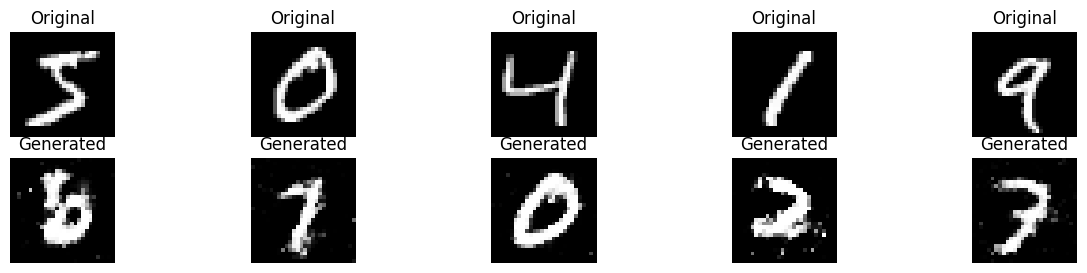

Comparing original and generated images at epoch 9000
1/1 [==============================] - 0s 28ms/step


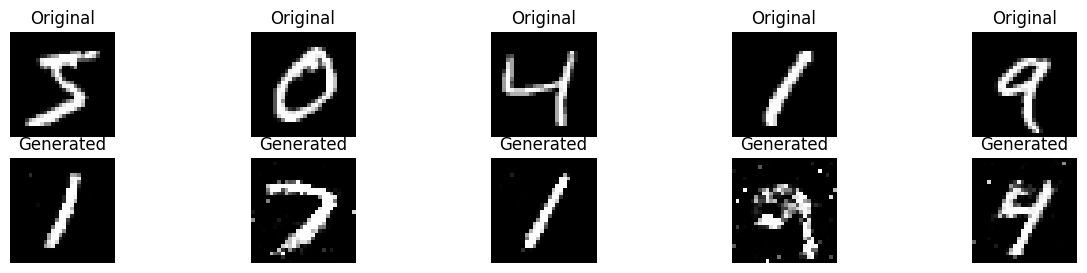

Comparing original and generated images at epoch 10000
1/1 [==============================] - 0s 34ms/step


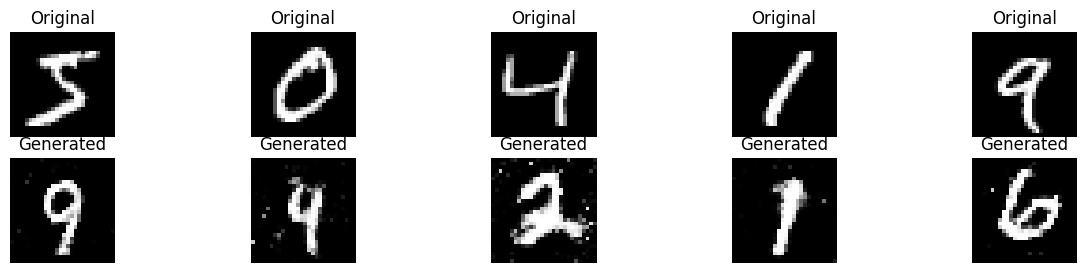

Comparing original and generated images at epoch 11000
1/1 [==============================] - 0s 32ms/step


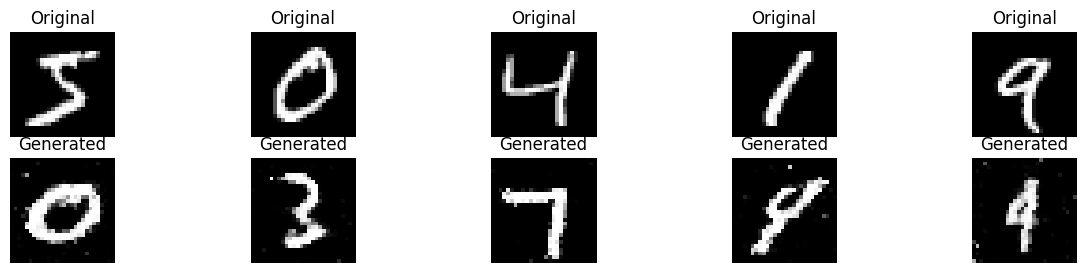

Comparing original and generated images at epoch 12000
1/1 [==============================] - 0s 30ms/step


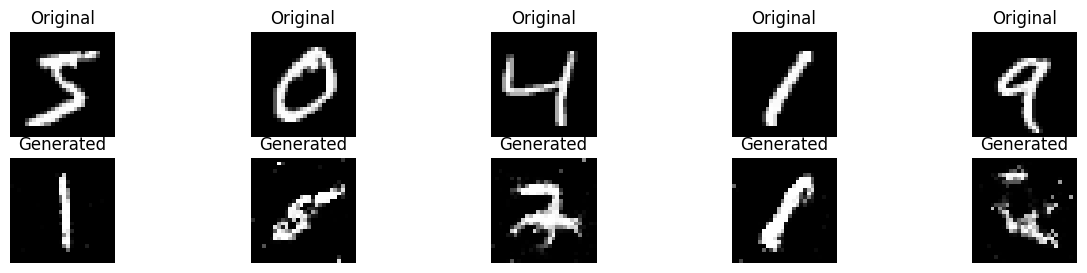

Comparing original and generated images at epoch 13000
1/1 [==============================] - 0s 31ms/step


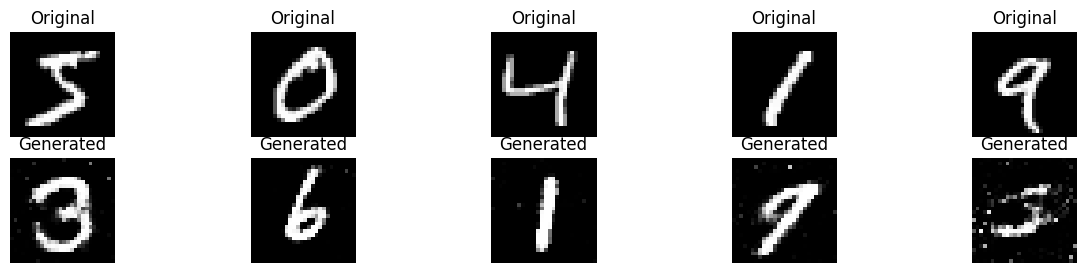

Comparing original and generated images at epoch 14000
1/1 [==============================] - 0s 23ms/step


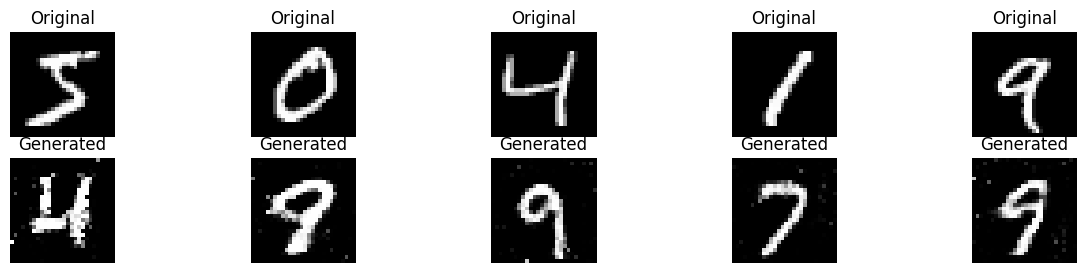

Comparing original and generated images at epoch 15000
1/1 [==============================] - 0s 23ms/step


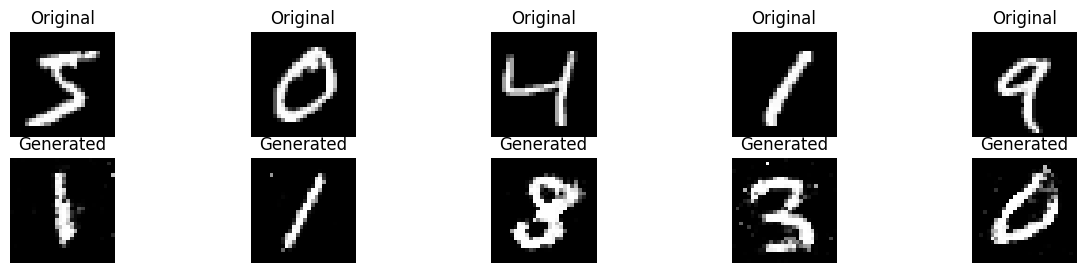

Comparing original and generated images at epoch 16000
1/1 [==============================] - 0s 24ms/step


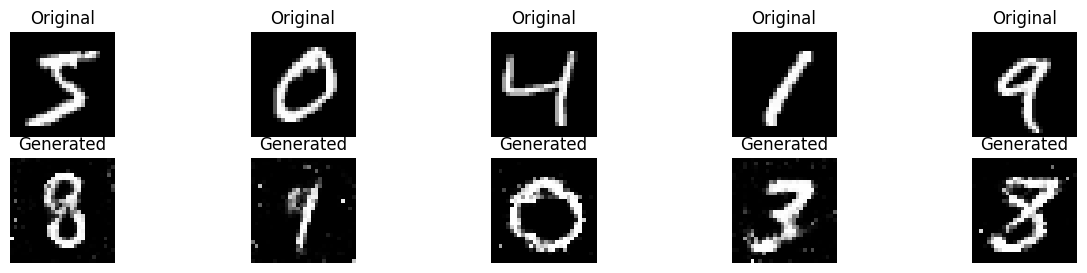

Comparing original and generated images at epoch 17000
1/1 [==============================] - 0s 23ms/step


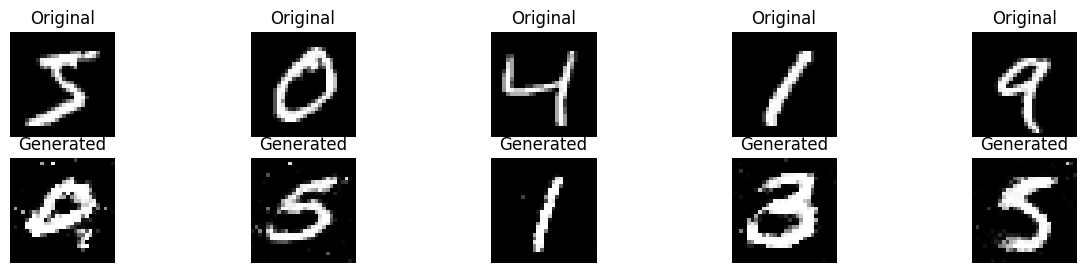

Comparing original and generated images at epoch 18000
1/1 [==============================] - 0s 24ms/step


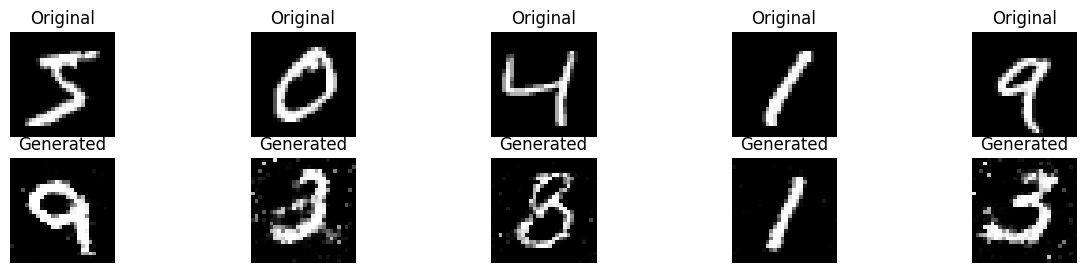

Comparing original and generated images at epoch 19000
1/1 [==============================] - 0s 25ms/step


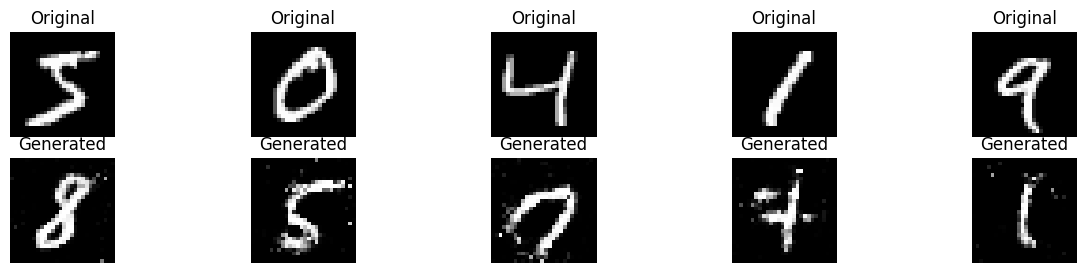

Comparing original and generated images at epoch 20000
1/1 [==============================] - 0s 25ms/step


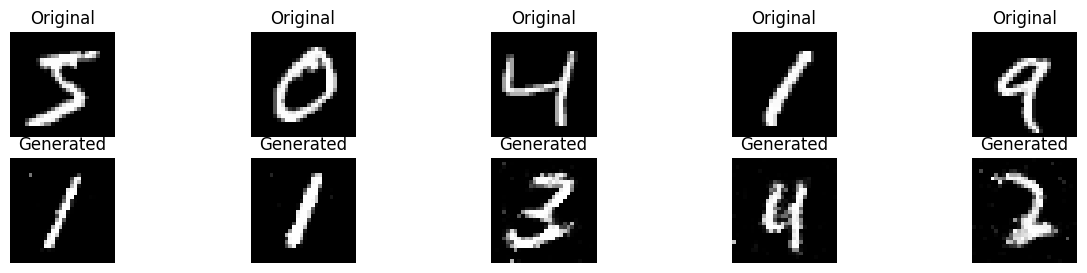

Comparing original and generated images at epoch 21000
1/1 [==============================] - 0s 21ms/step


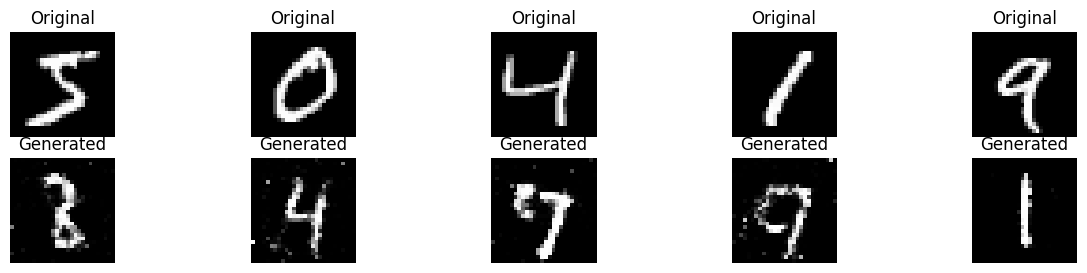

Comparing original and generated images at epoch 22000
1/1 [==============================] - 0s 30ms/step


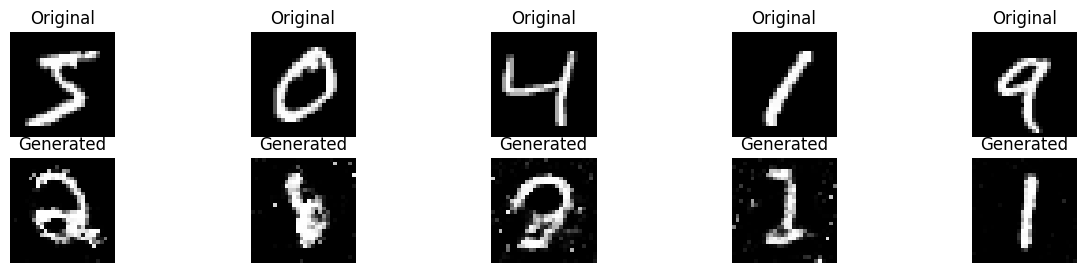

Comparing original and generated images at epoch 23000
1/1 [==============================] - 0s 22ms/step


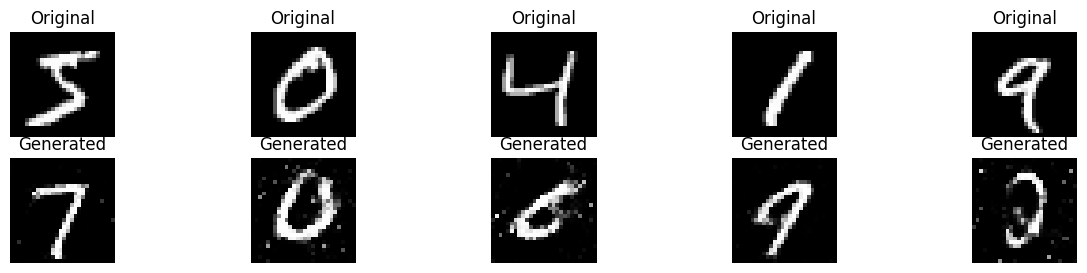

Comparing original and generated images at epoch 24000
1/1 [==============================] - 0s 22ms/step


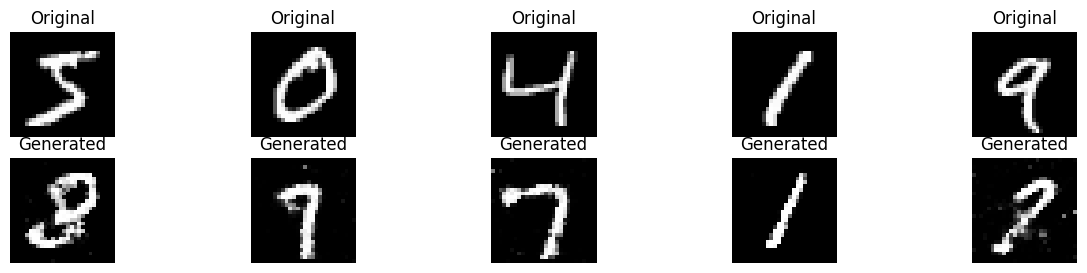

Comparing original and generated images at epoch 25000
1/1 [==============================] - 0s 24ms/step


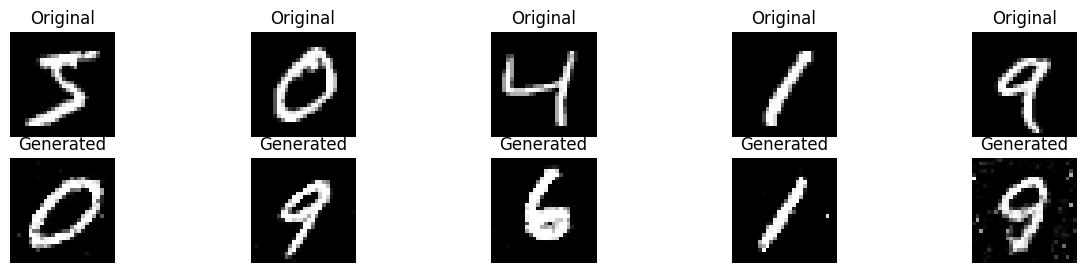

Comparing original and generated images at epoch 26000
1/1 [==============================] - 0s 25ms/step


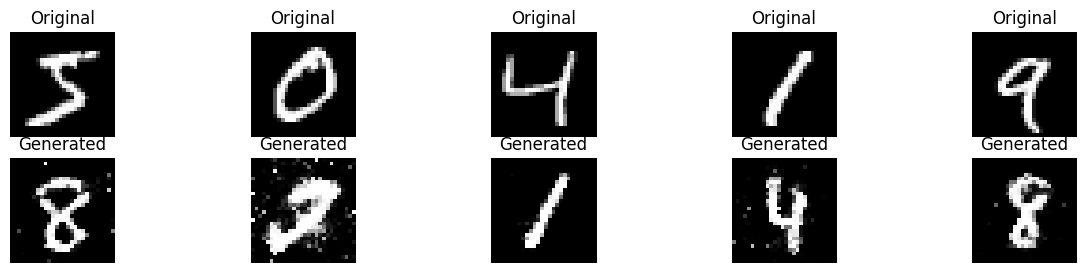

Comparing original and generated images at epoch 27000
1/1 [==============================] - 0s 22ms/step


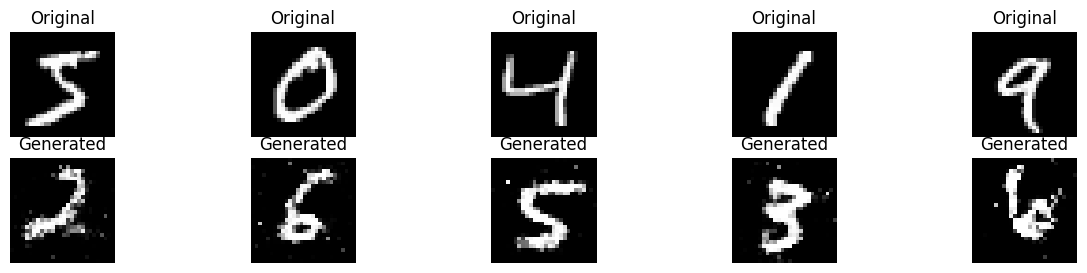

Comparing original and generated images at epoch 28000
1/1 [==============================] - 0s 30ms/step


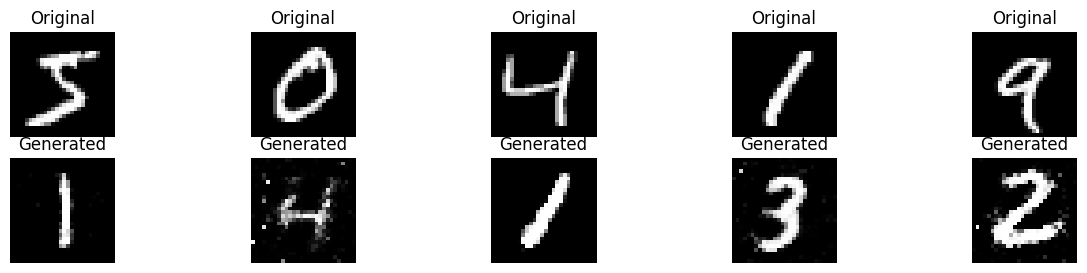

Comparing original and generated images at epoch 29000
1/1 [==============================] - 0s 22ms/step


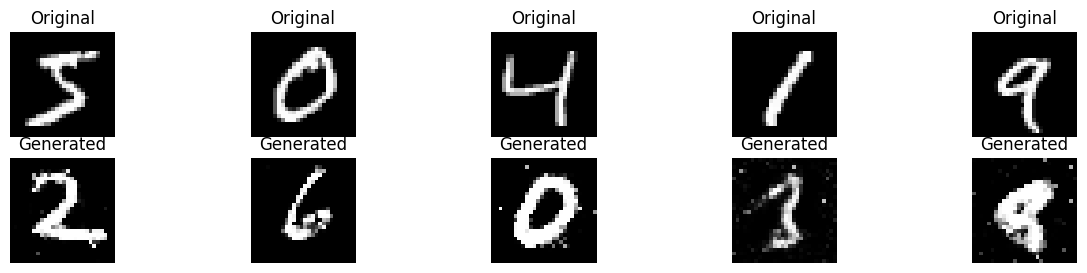

Comparing original and generated images at epoch 30000
1/1 [==============================] - 0s 25ms/step


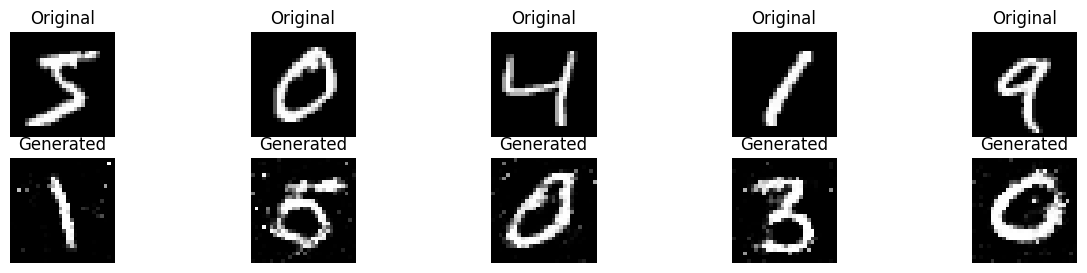

In [ ]:
def compare_images(original_images, generated_images):
    plt.figure(figsize=(15, 3))

    for i in range(5):
        # Imagem original
        plt.subplot(2, 5, i + 1)
        plt.imshow(original_images[i, :, :, 0], cmap='gray')
        plt.axis('off')
        plt.title('Original')

        # Imagem gerada
        plt.subplot(2, 5, i + 6)
        plt.imshow(generated_images[i, :, :, 0], cmap='gray')
        plt.axis('off')
        plt.title('Generated')

    plt.show()

# Exibir pares de imagens originais e geradas após cada 1000 épocas
for epoch in range(0, epochs + 1, save_interval):
    print(f"Comparing original and generated images at epoch {epoch}")
    noise = np.random.normal(0, 1, (5, latent_dim))
    generated_images = generator.predict(noise)
    generated_images = 0.5 * generated_images + 0.5
    compare_images(X_train[:5], generated_images)


CONECTAR AO GOOGLE DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FAZER UMA CÓPIA DOS RESULTADOS PARA O GOOGLE DRIVE

In [ ]:
%cp -r /content/GANs_images /content/drive/MyDrive/UFRJ/IMG_GANs